# **Install and import useful Python Libraries**


In [1]:
pip install matplotlib

In [2]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=ffd3ad72218c8495555471506dbd5d7b2a75d08724bce3bd41737b44926d13a3
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# **Get Bitcoin Historical data**

In [4]:
from os import close
# ticker = '^GSPC' # S&P 500
ticker = 'BTC-USD'
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2025, 1, 1)
SP_prices = yf.download(ticker, start=start, end=end, interval='1mo')\
            .Close


[*********************100%***********************]  1 of 1 completed


# **Bitcoin Data Available in Yahoo Finance from:**

In [5]:
import yfinance as yf
import pandas as pd

# Fetch historical data for Bitcoin (BTC-USD)
btc_data = yf.download('BTC-USD', start='2010-01-01', end='2014-12-31')

# Display the range of data received
print("Data Available from:", btc_data.index.min(), "to", btc_data.index.max())


[*********************100%***********************]  1 of 1 completed

Data Available from: 2014-09-17 00:00:00 to 2014-12-30 00:00:00


# **Bitcoin Pricing Yearly Chart**

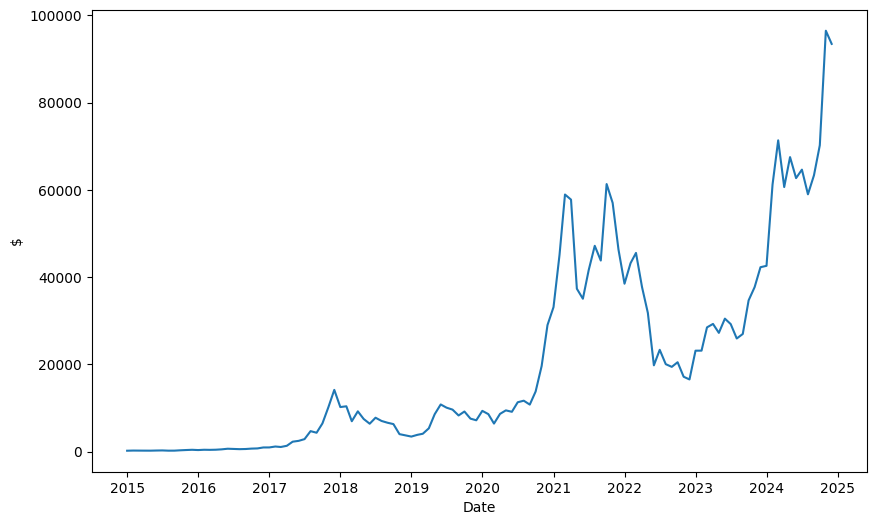

In [6]:
plt.figure(figsize=(10,6))
plt.plot(SP_prices)
#plt.title('S&P-500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

# **Bitcoin pricing in trend, seasonal, and residual.**

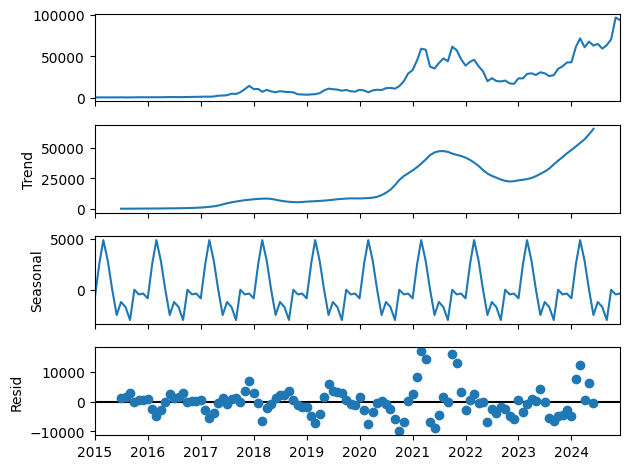

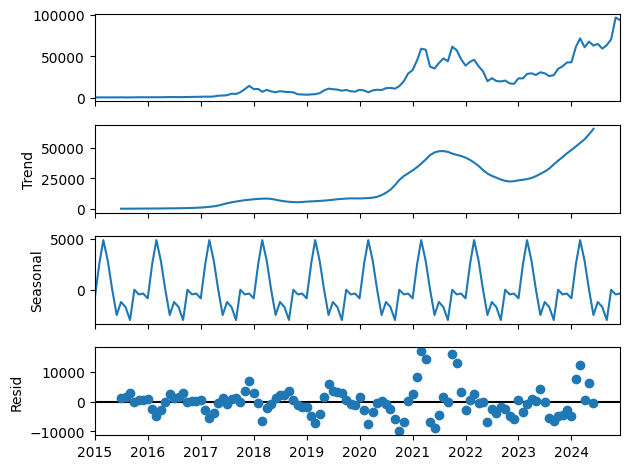

In [7]:
result = seasonal_decompose(SP_prices, period=12)
result.plot()

# **Autocorrelation Chart**

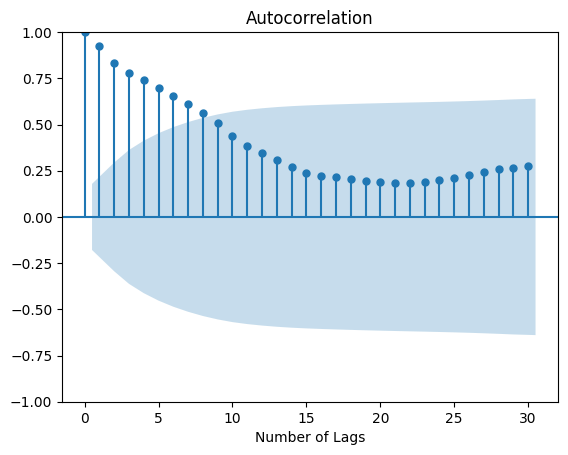

In [8]:
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

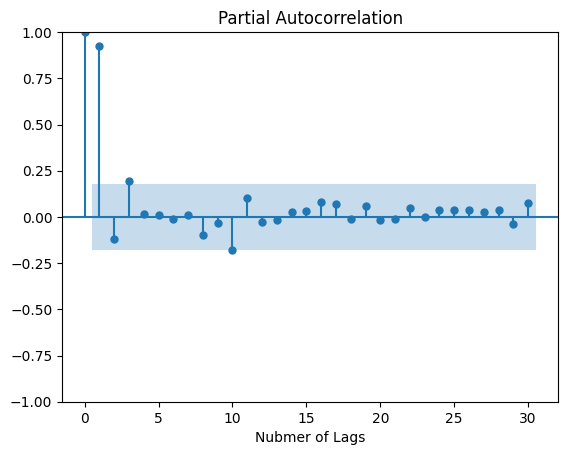

In [9]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel('Nubmer of Lags')
plt.show


Text(0.5, 0, 'Date')

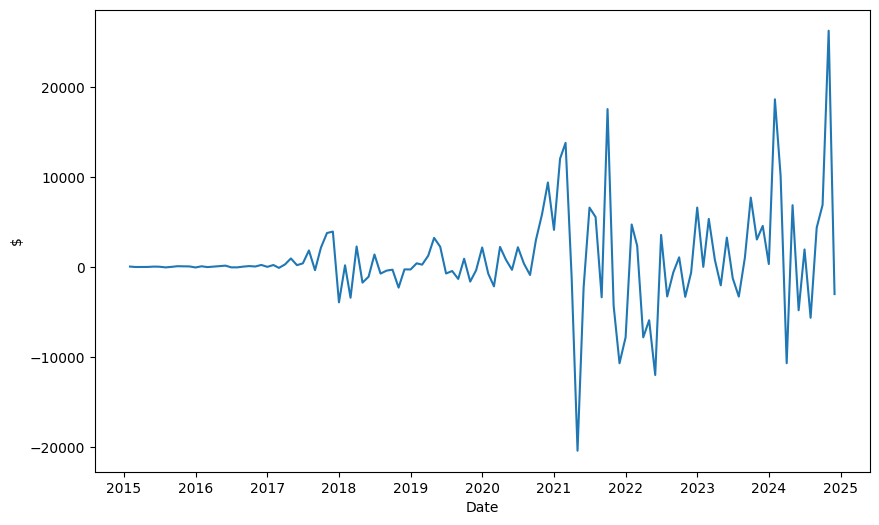

In [10]:
diff_SP_price = SP_prices.diff()
plt.figure(figsize=(10,6))
plt.plot(diff_SP_price)
#plt.title('Differenced S&P-500 Price')
plt.ylabel('$')
plt.xlabel('Date')


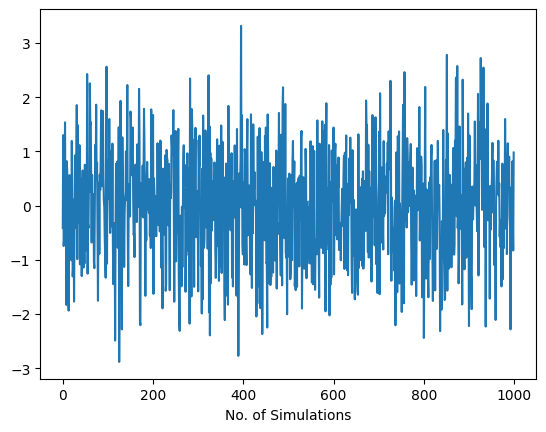

In [11]:
mu = 0  # mean
std = 1  # standard deviation
WN = np.random.normal(mu, std, 1000)

plt.plot(WN)
plt.xlabel('No. of Simulations')
plt.show()


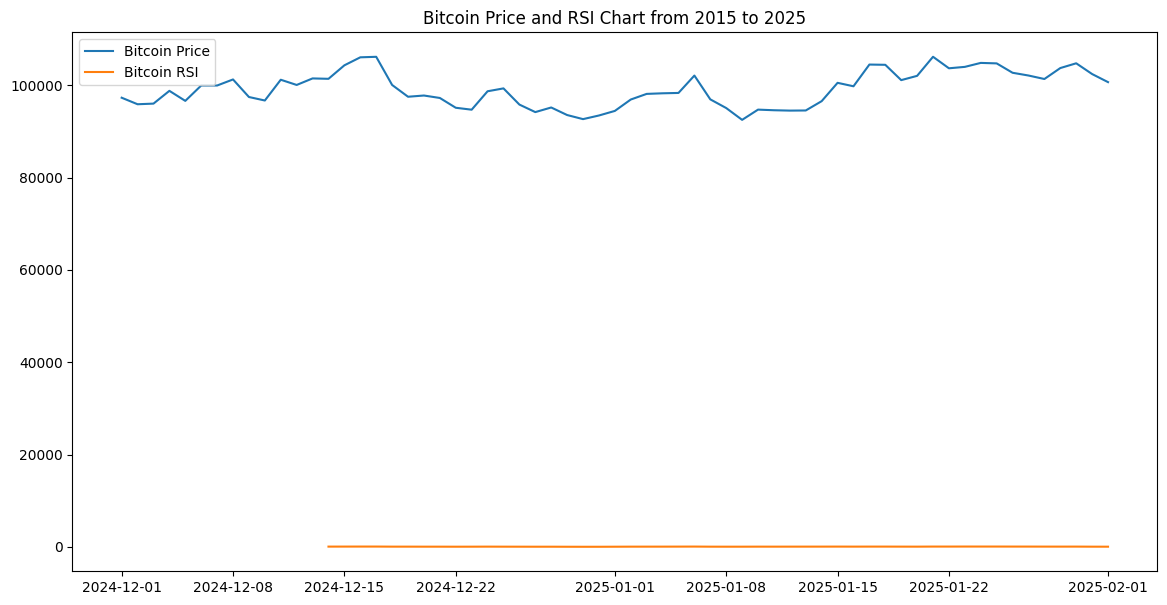

In [22]:
# Fetch historical data from 2015-01-01 to 2025-01-01
start_date = '2024-12-01'
end_date = '2025-02-02'
bitcoin = yf.Ticker("BTC-USD")
bitcoin_df = bitcoin.history(start=start_date, end=end_date)

# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

window = 14
bitcoin_df['RSI'] = calculate_rsi(bitcoin_df, window)

# Plot the chart
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_df['Close'], label='Bitcoin Price')
plt.plot(bitcoin_df['RSI'], label='Bitcoin RSI')
plt.title('Bitcoin Price and RSI Chart from 2015 to 2025')
plt.legend()
plt.show()


# **Bitcoin RSI 2015-2025**

[*********************100%***********************]  1 of 1 completed


Price               Close        RSI
Ticker            BTC-USD           
Date                                
2025-01-28  101332.476562  51.846799
2025-01-29  103703.210938  56.825057
2025-01-30  104735.304688  58.821003
2025-01-31  102405.023438  52.877261
2025-02-01  100655.906250  48.884325


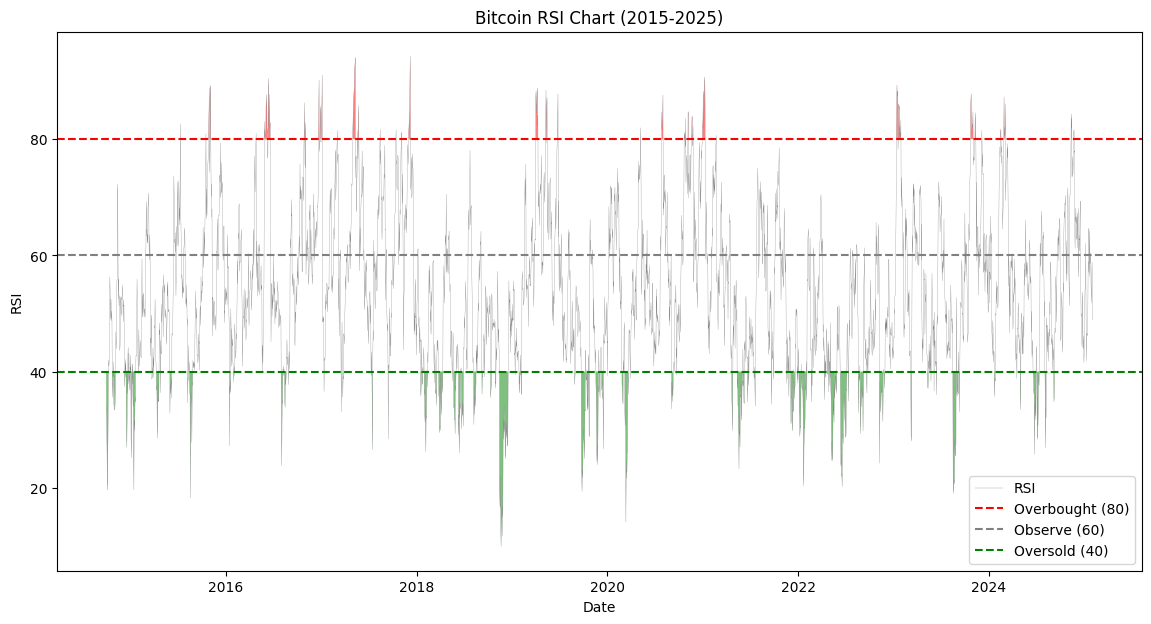

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

# Fetch historical data for Bitcoin (BTC-USD)
btc_data = yf.download('BTC-USD', start='2012-01-01', end='2025-2-2')

# Ensure 'Close' prices are in 1-dimensional format
btc_close = btc_data['Close'].values.flatten()

# Convert to Pandas Series
btc_close_series = pd.Series(btc_close, index=btc_data.index)

# Calculate the RSI
rsi_indicator = ta.momentum.RSIIndicator(close=btc_close_series, window=14, fillna=False)
btc_data['RSI'] = rsi_indicator.rsi()

# Check the data
print(btc_data[['Close', 'RSI']].tail())

# Plot the RSI
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['RSI'], label='RSI', color='grey', linewidth=0.2)
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(60, color='grey', linestyle='--', label='Observe (60)')
plt.axhline(40, color='green', linestyle='--', label='Oversold (40)')
plt.fill_between(btc_data.index, 80, btc_data['RSI'], where=(btc_data['RSI'] >= 80), facecolor='red', alpha=0.5)
plt.fill_between(btc_data.index, 40, btc_data['RSI'], where=(btc_data['RSI'] <= 40), facecolor='green', alpha=0.5)
plt.title('Bitcoin RSI Chart (2015-2025)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()



# **Polynomial Regression for estimating Bitcoin halving prices**

[*********************100%***********************]  1 of 1 completed


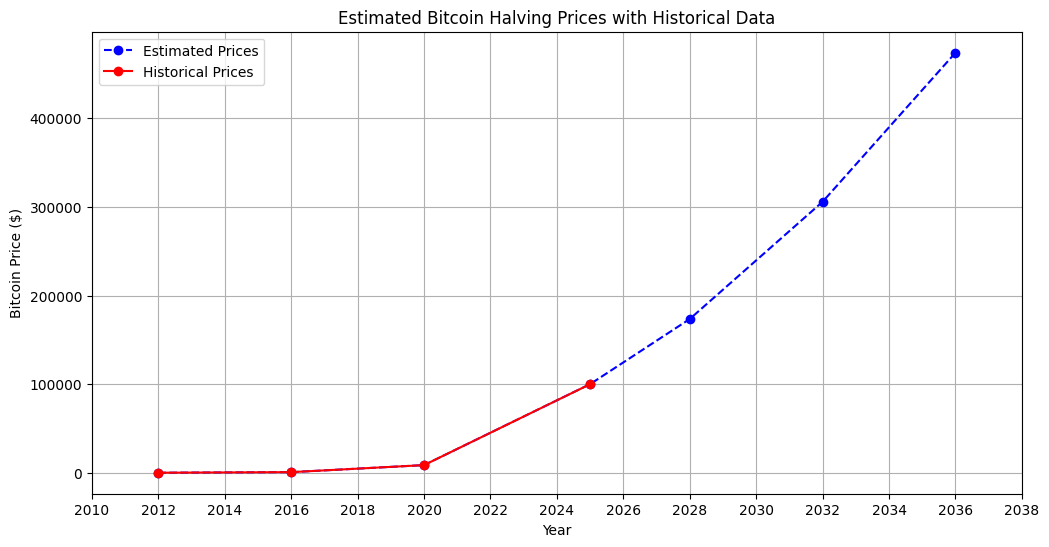

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetch historical data for Bitcoin (BTC-USD)
btc_data = yf.download('BTC-USD', start='2010-01-01', end='2025-01-21')['Close']

# Define historical halving dates and prices
halving_dates = pd.to_datetime(['2012-11-28', '2016-07-09', '2020-05-11'])
halving_prices = [12.35, 650.96, 8601.76]

# Add current price for 2025
final_year = pd.to_datetime('2025-01-01')
final_price = 100000
halving_dates = np.append(halving_dates, final_year)
halving_prices = np.append(halving_prices, final_price)

# Convert halving dates to years
years = np.array([date.year for date in pd.to_datetime(halving_dates)]).reshape(-1, 1)

# Train polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(years)
model = LinearRegression().fit(X_poly, halving_prices)

# Define future halving periods (5th, 6th, 7th)
future_years = np.array([2028, 2032, 2036]).reshape(-1, 1)
future_poly = poly.transform(future_years)
predicted_prices = model.predict(future_poly)

# Combine historical and predicted data
all_years = np.concatenate([years, future_years]).reshape(-1, 1)
all_prices = np.concatenate([halving_prices, predicted_prices])

# Plot the historical and predicted values separately
plt.figure(figsize=(12, 6))
plt.plot(all_years, all_prices, marker='o', linestyle='--', color='blue', label='Estimated Prices')
plt.plot(years, halving_prices, marker='o', linestyle='-', color='red', label='Historical Prices')  # Red line segment for historical data
plt.xticks(np.arange(2010, 2040, step=2))
plt.xlabel('Year')
plt.ylabel('Bitcoin Price ($)')
plt.title('Estimated Bitcoin Halving Prices with Historical Data')
plt.legend()
plt.grid(True)
plt.show()



# **Sharpe Ratio of Bitcoin Every Year since 2015**

In [15]:
# Fetch historical data for Bitcoin (BTC-USD)
btc_data = yf.download('BTC-USD', start='2015-01-01', end='2025-01-21')

# Calculate the daily returns
btc_data['Daily Return'] = btc_data['Close'].pct_change()

# Function to calculate the Sharpe Ratio for a given year
def calculate_sharpe_ratio(data):
    mean_daily_return = data['Daily Return'].mean()
    std_daily_return = data['Daily Return'].std()
    trading_days = 252  # typical number of trading days in a year
    annual_mean_return = mean_daily_return * trading_days
    annual_std_return = std_daily_return * np.sqrt(trading_days)
    sharpe_ratio = annual_mean_return / annual_std_return
    return annual_mean_return, annual_std_return, sharpe_ratio

# List to store Sharpe Ratios by year
annual_metrics = []

# Calculate the Sharpe Ratios for each year and store them in the list
for year in range(2015, 2026):
    yearly_data = btc_data[btc_data.index.year == year]
    if not yearly_data.empty:
        annual_mean_return, annual_std_return, sharpe_ratio = calculate_sharpe_ratio(yearly_data)
        annual_metrics.append({
            'Year': year,
            'Annual Mean Return': annual_mean_return,
            'Annual Std Deviation': annual_std_return,
            'Sharpe Ratio': sharpe_ratio
        })

# Convert the list to a DataFrame
sharpe_ratios_by_year = pd.DataFrame(annual_metrics, columns=['Year', 'Annual Mean Return', 'Annual Std Deviation', 'Sharpe Ratio'])

# Display the table of Sharpe Ratios by year
print(sharpe_ratios_by_year)


[*********************100%***********************]  1 of 1 completed


    Year  Annual Mean Return  Annual Std Deviation  Sharpe Ratio
0   2015            0.385660              0.572132      0.674075
1   2016            0.635226              0.399017      1.591975
2   2017            2.170310              0.792442      2.738761
3   2018           -0.687756              0.673565     -1.021068
4   2019            0.609171              0.565509      1.077207
5   2020            1.154628              0.598599      1.928882
6   2021            0.545474              0.668160      0.816382
7   2022           -0.568741              0.527967     -1.077229
8   2023            0.713256              0.363653      1.961365
9   2024            0.644498              0.444954      1.448458
10  2025            1.184325              0.394446      3.002500


# **Sharpe Ratio for Bitcoin in 2024**

In [16]:
# Fetch historical data for Bitcoin (BTC-USD)
btc_data = yf.download('BTC-USD', start='2024-01-01', end='2024-12-31')

# Calculate the daily returns
btc_data['Daily Return'] = btc_data['Close'].pct_change()

# Calculate the average return and standard deviation of daily returns
mean_daily_return = btc_data['Daily Return'].mean()
std_daily_return = btc_data['Daily Return'].std()

# Annualize the mean return and standard deviation
trading_days = 252  # typical number of trading days in a year
annual_mean_return = mean_daily_return * trading_days
annual_std_return = std_daily_return * np.sqrt(trading_days)

# Calculate the Sharpe Ratio (assuming a risk-free rate of 0 for simplicity)
sharpe_ratio = annual_mean_return / annual_std_return

print(f"Annual Mean Return: {annual_mean_return:.2f}")
print(f"Annual Standard Deviation: {annual_std_return:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



[*********************100%***********************]  1 of 1 completed

Annual Mean Return: 0.61
Annual Standard Deviation: 0.44
Sharpe Ratio: 1.37


# **Sharpe Ratio of Bitcoin and Gold in 2024**

In [21]:
import yfinance as yf
import numpy as np
import pandas as pd

# Fetch historical data for Bitcoin and Gold
bitcoin = yf.download('BTC-USD', start='2024-01-01', end='2025-2-2')['Close']
gold = yf.download('GLD', start='2024-01-01', end='2025-2-2')['Close']

# Calculate daily returns
bitcoin_returns = bitcoin.pct_change().dropna()
gold_returns = gold.pct_change().dropna()

# Assume a risk-free rate (e.g., 0.05 for 5% annual return)
risk_free_rate = 0.05 / 252  # daily risk-free rate

# Calculate excess returns
excess_return_bitcoin = bitcoin_returns - risk_free_rate
excess_return_gold = gold_returns - risk_free_rate

# Calculate Sharpe ratios
sharpe_ratio_bitcoin = (excess_return_bitcoin.mean() / excess_return_bitcoin.std()).mean() * np.sqrt(252)
sharpe_ratio_gold = (excess_return_gold.mean() / excess_return_gold.std()).mean() * np.sqrt(252)

# Display results
print(f"Sharpe Ratio for Bitcoin: {sharpe_ratio_bitcoin:.2f}")
print(f"Sharpe Ratio for Gold: {sharpe_ratio_gold:.2f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sharpe Ratio for Bitcoin: 1.30
Sharpe Ratio for Gold: 1.64


# **Correlation between Bitcoin and SPX**

In [28]:
import yfinance as yf
import pandas as pd

# Fetch historical data for Bitcoin and SPX (S&P 500)
bitcoin = yf.download('BTC-USD', start='2020-01-01', end='2024-12-31')['Close']
spx = yf.download('^GSPC', start='2020-01-01', end='2024-12-31')['Close']

# Calculate daily returns
bitcoin_returns = bitcoin.pct_change().dropna()
spx_returns = spx.pct_change().dropna()

# Align the indexes of both returns series
aligned_returns = pd.concat([bitcoin_returns, spx_returns], axis=1).dropna()
aligned_returns.columns = ['Bitcoin', 'SPX']

# Calculate the correlation matrix
correlation_matrix = aligned_returns.corr()

# Display the correlation between Bitcoin and SPX
correlation = correlation_matrix.loc['Bitcoin', 'SPX']
print(f"Correlation between Bitcoin and SPX: {correlation:.2f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Correlation between Bitcoin and SPX: 0.38
